In [1]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Kết nối google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = "/content/drive/MyDrive/KKDL/dataset_classifier/training/"
val_path = "/content/drive/MyDrive/KKDL/dataset_classifier/validation/"
test_path = "/content/drive/MyDrive/KKDL/dataset_classifier/testing/"

categories = ['stinkbug', 'stag-beetle', 'snail', 'red-spider', 'moth', 'mealybug-disease', 'maybug', 'leafroller', 'grasshopper', 'fruit-bores' ]

In [4]:
#Tăng cường dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(44, 44),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(44, 44),
    batch_size=32,
    class_mode='categorical'
)

Found 1944 images belonging to 10 classes.
Found 699 images belonging to 10 classes.


In [6]:
#Tên con vật sẽ đc mã hóa lại thành số
class_names = train_generator.class_indices

print(class_names)

{'fruit-bores': 0, 'grasshopper': 1, 'leafroller': 2, 'maybug': 3, 'mealybug-disease': 4, 'moth': 5, 'red-spider': 6, 'snail': 7, 'stag-beetle': 8, 'stinkbug': 9}


In [7]:
WIDTH = 44
HEIGHT = 44
EPOCHS = 30
#Trích đặt trưng Deep Learning
model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Convolution2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

#model.fit(train_generator, validation_data=val_generator, batch_size=100, epochs=EPOCHS, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 18, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3888)              0         
                                                                 
 dense (Dense)               (None, 256)               9

In [8]:
!pip install scikit-learn

In [9]:
!pip install scikit-learn[tree]

In [10]:
# Xay dung cay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Model

In [11]:
# Tạo mô hình mới chỉ lấy đặc trưng của tầng Dense
new_model = Model(inputs=model.input, outputs=model.get_layer('dense_1').output)

In [12]:
# Lấy đặc trưng của tập huấn luyện và tập validation
features_train = new_model.predict(train_generator)
features_val = new_model.predict(val_generator)

22/22 [==============================] - 187s 9s/step


In [13]:
# Huấn luyện mô hình DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="gini", max_depth=500, min_samples_leaf=20, random_state=42)
decision_tree_model.fit(features_train, train_generator.classes)

DecisionTreeClassifier(max_depth=500, min_samples_leaf=20, random_state=42)

In [14]:
# Đánh giá độ chính xác của mô hình Decision Tree trên tập validation
accuracy_decision_tree = decision_tree_model.score(features_val, val_generator.classes)
print("Accuracy of Decision Tree model on validation set:", accuracy_decision_tree)

Accuracy of Decision Tree model on validation set: 0.12160228898426323


In [15]:
import cv2
# Đọc ảnh thực tế
image_path = '/content/drive/MyDrive/KKDL/dataset_classifier/testing/moth/moth_15.jpg'
image = cv2.imread(image_path)

In [16]:
# Resize ảnh về kích thước mà mô hình yêu cầu (WIDTH, HEIGHT)
resized_image = cv2.resize(image, (WIDTH, HEIGHT))
# Chuẩn hóa ảnh
new_image_array = resized_image / 255.0

In [17]:
# Lấy đặc trưng của ảnh mới
new_image_feature = new_model.predict(new_image_array.reshape(1, WIDTH, HEIGHT, 3))

1/1 [==============================] - 0s 238ms/step


In [18]:
# Dự đoán
prediction = decision_tree_model.predict(new_image_feature)
print("Predicted class for the new image:", prediction)

Predicted class for the new image: [4]


In [ ]:
class_names = train_generator.class_indices

print(class_names)

{'fruit-bores': 0, 'grasshopper': 1, 'leafroller': 2, 'maybug': 3, 'mealybug-disease': 4, 'moth': 5, 'red-spider': 6, 'snail': 7, 'stag-beetle': 8, 'stinkbug': 9}


1/1 [==============================] - 0s 94ms/step
Predicted class: stinkbug
Class probabilities: [0.06834727 0.09559111 0.09830412 0.09794491 0.10214347 0.11195798
 0.09305003 0.10204036 0.11369718 0.1169236 ]


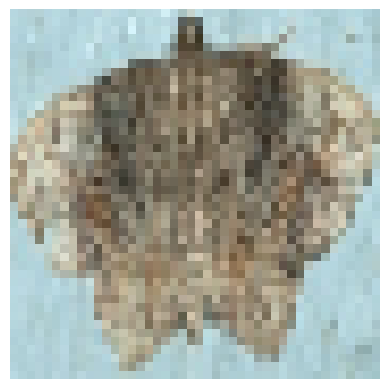

In [21]:
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt

def predict_and_verify(model, class_names, image_path):
    global WIDTH
    global HEIGHT

    img = image.load_img(image_path, target_size=(WIDTH, HEIGHT))  # Thay đổi kích thước theo kiến trúc LeNet

    # Chuyển ảnh thành mảng NumPy
    img_array = image.img_to_array(img)

    # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    img_array /= 255.0

    # Thêm một chiều để tạo thành batch (nếu cần)
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán lớp của ảnh
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = list(class_names.keys())[predicted_class_index]

    # In ra kết quả dự đoán và xác suất của các lớp
    print(f"Predicted class: {predicted_class_name}")
    print(f"Class probabilities: {predictions[0]}")

    # Hiển thị ảnh để kiểm tra
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Sử dụng hàm để dự đoán và xác minh kết quả
image_path_to_verify = '/content/drive/MyDrive/KKDL/dataset_classifier/testing/moth/moth_158.jpg'
# predict_and_verify(model, train_generator.class_indices, image_path_to_verify)
class_names = {
    'fruit-bores': 0,
    'grasshopper': 1,
    'leafroller': 2,
    'maybug': 3,
    'mealybug-disease': 4,
    'moth': 5,
    'red-spider': 6,
    'snail': 7,
    'stag-beetle': 8,
    'stinkbug': 9
}
predict_and_verify(model, class_names, image_path_to_verify)